In [ ]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Library Requirements in order to plot the Geological Heat Map, read the csv, shape file and to plot the graphs
import pandas as pd
import matplotlib.pyplot as plt
import descartes #library needed for Geological Heat Map
!pip install -q condacolab
import condacolab
from shapely.geometry import Point,Polygon #library needed for Geological Heat Map

%matplotlib inline

In [ ]:
import condacolab

In [ ]:
!pip install git+git://github.com/geopandas/geopandas.git

  Cloning git://github.com/geopandas/geopandas.git to /tmp/pip-req-build-vvmq6r9u
  Running command git clone -q git://github.com/geopandas/geopandas.git /tmp/pip-req-build-vvmq6r9u
     |████████████████████████████████| 15.4 MB 38 kB/s 
     |████████████████████████████████| 6.3 MB 48.8 MB/s 
  Created wheel for geopandas: filename=geopandas-0.10.2+7.g17fe21e-py2.py3-none-any.whl size=1031740 sha256=b9fc94f4696a7706334b95a1f7c4fed370dd68d087370e73493c58f697c51d9c
  Stored in directory: /tmp/pip-ephem-wheel-cache-0jdnjh0_/wheels/cf/3e/0b/6475054094c2b1ea054158ac1fdcf749fb92f5b512377e4cf8
Successfully built geopandas


In [ ]:
import geopandas as gpd

In [ ]:
#from google.colab import files
#uploaded = files.upload()

In [ ]:
# A shape file containing the cities,highways and district boundaries of California are imported
street_map = gpd.read_file('/content/drive/My Drive/Colab Notebooks/Geo/california_administrative.zip')

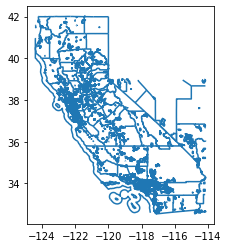

In [ ]:
#Plot the Cities and Highways connecting each cities of California using plt.subplots()
fig,ax = plt.subplots()
street_map.plot(ax = ax)

In [ ]:
#The csv file containing the latitudes and longitudes of each cities california is imported using the pandas library as pd
cities = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Geo/cal_cities_lat_long.csv')
cities.head()

,Name,Latitude,Longitude,AQI
0,Adelanto,34.582769,-117.409214,47
1,Agoura Hills,34.153339,-118.761675,76
2,Alameda,37.765206,-122.241636,41
3,Albany,37.886869,-122.297747,28
4,Alhambra,34.095286,-118.127014,123


In [ ]:
crs = {'init':'epsg:4326'}
cities.head() #Displays the first five entries of the dataset

,Name,Latitude,Longitude,AQI
0,Adelanto,34.582769,-117.409214,47
1,Agoura Hills,34.153339,-118.761675,76
2,Alameda,37.765206,-122.241636,41
3,Albany,37.886869,-122.297747,28
4,Alhambra,34.095286,-118.127014,123


In [ ]:
#The Geometrical points needed as collection of Longitude and Latitude in order to plot the Geological Heat Map is collected
geometry = [Point(xy) for xy in zip(cities["Longitude"],cities["Latitude"])]
geometry[:3]

In [ ]:
#The Geometrical points needed for plotting the cities are collected in the format of Point(a,b)
geo_df = gpd.GeoDataFrame(cities,crs=crs,geometry=geometry)
geo_df.head()

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,Name,Latitude,Longitude,AQI,geometry
0,Adelanto,34.582769,-117.409214,47,POINT (-117.40921 34.58277)
1,Agoura Hills,34.153339,-118.761675,76,POINT (-118.76167 34.15334)
2,Alameda,37.765206,-122.241636,41,POINT (-122.24164 37.76521)
3,Albany,37.886869,-122.297747,28,POINT (-122.29775 37.88687)
4,Alhambra,34.095286,-118.127014,123,POINT (-118.12701 34.09529)


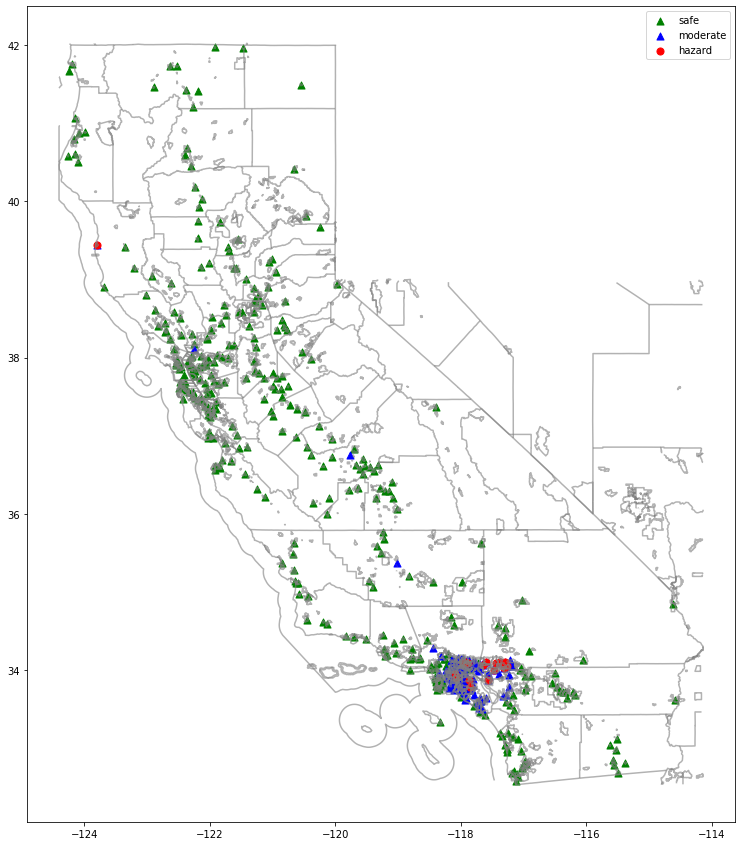

In [ ]:
#Based on the AQI the cities that are in the safe, moderate and hazard zones are plotted in the California State map
fig,ax = plt.subplots(figsize=(15,15))
street_map.plot(ax = ax, alpha= 0.6,color="grey")
geo_df[geo_df['AQI']<100].plot(ax = ax, markersize = 50, color="green",marker="^",label="safe")
geo_df[geo_df['AQI']>=100].plot(ax = ax, markersize = 50, color="blue",marker="^",label="moderate")
geo_df[geo_df['AQI']>150].plot(ax = ax, markersize = 50, color="red",marker="o",label="hazard")
plt.legend()

In [ ]:
#A function to find the distance between two cities using the Latitude and Longitude is computed using Haversine Distance
def haversine_distance(lat1, lon1, lat2, lon2):
   r = 6371
   phi1 = np.radians(lat1)
   phi2 = np.radians(lat2)
   delta_phi = np.radians(lat2 - lat1)
   delta_lambda = np.radians(lon2 - lon1)
   a = np.sin(delta_phi / 2)**2 + np.cos(phi1) * np.cos(phi2) *   np.sin(delta_lambda / 2)**2
   res = r * (2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a)))
   return np.round(res, 2)

In [ ]:
#Assigning the city names to a list so that the toxic hit list cities can be alerted 
city_names = cities["Name"].tolist
print(city_names)

<bound method IndexOpsMixin.tolist of 0          Adelanto
1      Agoura Hills
2           Alameda
3            Albany
4          Alhambra
           ...     
454        Woodland
455     Yorba Linda
456           Yreka
457       Yuba City
458         Yucaipa
Name: Name, Length: 459, dtype: object>


In [ ]:
city_lat = cities["Latitude"].tolist
print(city_lat)

<bound method IndexOpsMixin.tolist of 0      34.582769
1      34.153339
2      37.765206
3      37.886869
4      34.095286
         ...    
454    38.678517
455    33.888625
456    41.735419
457    39.140447
458    34.033625
Name: Latitude, Length: 459, dtype: float64>


In [ ]:
city_long = cities["Longitude"].tolist
print(city_long)

<bound method IndexOpsMixin.tolist of 0     -117.409214
1     -118.761675
2     -122.241636
3     -122.297747
4     -118.127014
          ...    
454   -121.773297
455   -117.813111
456   -122.634472
457   -121.616911
458   -117.043086
Name: Longitude, Length: 459, dtype: float64>


In [ ]:
start_lat, start_lon = 36.746842, -119.772586

In [ ]:
#for each row in the Dataset containing the Latitude and Longitude of the cities, the Distance is calculated using the haversine function
import numpy as np
distances_km = []
for row in cities.itertuples(index=False):
   distances_km.append(
       haversine_distance(start_lat, start_lon, row.Latitude, row.Longitude)
   )

In [ ]:
cities['DistanceFromHotspot'] = distances_km

In [ ]:
print(distances_km)

[321.67, 302.57, 246.11, 256.76, 330.39, 398.74, 531.26, 207.78, 270.99, 365.02, 466.37, 161.71, 227.69, 329.84, 590.87, 195.46, 355.13, 191.47, 161.42, 99.88, 265.07, 400.68, 88.54, 336.11, 167.09, 338.42, 409.14, 322.59, 402.99, 339.83, 342.44, 352.21, 237.97, 268.96, 254.02, 322.2, 380.16, 341.57, 140.16, 586.9, 585.52, 331.96, 570.28, 357.6, 321.16, 254.78, 240.22, 358.36, 314.6, 247.94, 307.03, 597.51, 241.58, 391.65, 559.18, 320.21, 289.13, 202.43, 409.19, 195.66, 455.99, 193.04, 262.09, 351.26, 446.05, 141.13, 356.6, 377.39, 357.95, 358.02, 60.23, 518.53, 255.16, 348.46, 232.8, 351.02, 365.63, 10.7, 472.31, 85.56, 281.48, 371.45, 337.19, 338.56, 346.88, 242.02, 242.02, 411.24, 376.83, 509.77, 384.21, 312.94, 341.11, 674.82, 341.61, 327.75, 210.55, 204.56, 260.77, 410.6, 264.55, 479.22, 184.73, 118.52, 428.83, 350.69, 41.17, 261.36, 609.04, 80.49, 345.72, 332.41, 219.01, 541.02, 224.84, 368.67, 508.85, 584.01, 259.34, 337.17, 337.62, 232.39, 252.87, 470.44, 159.3, 471.83, 588.85,

In [ ]:
from google.colab import files
cities.to_csv('filename.csv') 
files.download('filename.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
cities.head()

,Name,Latitude,Longitude,AQI,geometry,DistanceFromNY,DistanceFromHotspot
0,Adelanto,34.582769,-117.409214,47,POINT (-117.40921 34.58277),321.67,321.67
1,Agoura Hills,34.153339,-118.761675,76,POINT (-118.76167 34.15334),302.57,302.57
2,Alameda,37.765206,-122.241636,41,POINT (-122.24164 37.76521),246.11,246.11
3,Albany,37.886869,-122.297747,28,POINT (-122.29775 37.88687),256.76,256.76
4,Alhambra,34.095286,-118.127014,123,POINT (-118.12701 34.09529),330.39,330.39


In [ ]:
cities.drop(['DistanceFromNY'],axis=1)

,Name,Latitude,Longitude,AQI,geometry,DistanceFromHotspot
0,Adelanto,34.582769,-117.409214,47,POINT (-117.40921 34.58277),321.67
1,Agoura Hills,34.153339,-118.761675,76,POINT (-118.76167 34.15334),302.57
2,Alameda,37.765206,-122.241636,41,POINT (-122.24164 37.76521),246.11
3,Albany,37.886869,-122.297747,28,POINT (-122.29775 37.88687),256.76
4,Alhambra,34.095286,-118.127014,123,POINT (-118.12701 34.09529),330.39
...,...,...,...,...,...,...
454,Woodland,38.678517,-121.773297,21,POINT (-121.77330 38.67852),277.67
455,Yorba Linda,33.888625,-117.813111,127,POINT (-117.81311 33.88862),364.14
456,Yreka,41.735419,-122.634472,52,POINT (-122.63447 41.73542),606.89
457,Yuba City,39.140447,-121.616911,38,POINT (-121.61691 39.14045),311.42


In [ ]:
cities.head()

,Name,Latitude,Longitude,AQI,geometry,DistanceFromNY,DistanceFromHotspot
0,Adelanto,34.582769,-117.409214,47,POINT (-117.40921 34.58277),321.67,321.67
1,Agoura Hills,34.153339,-118.761675,76,POINT (-118.76167 34.15334),302.57,302.57
2,Alameda,37.765206,-122.241636,41,POINT (-122.24164 37.76521),246.11,246.11
3,Albany,37.886869,-122.297747,28,POINT (-122.29775 37.88687),256.76,256.76
4,Alhambra,34.095286,-118.127014,123,POINT (-118.12701 34.09529),330.39,330.39
